# Assignment 1

**Group Members**
- Camacho, Ronaldo. Matricola: 2051119
- Casara, Letizia. Matricola: 2063144
- Girardi Giorgia. Matricola: 2058916
- Quaini Alessandro. Matricola: 2038510
- Rosa Valentina. Matricola: 2048656

## The problem reads as follows:

"Suppose you're on a game show, and you're given the choice of three doors: behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

Q1) What is the probability to win switching door, knowing that the host knows where it is the price and open always the door with a goat?

Q2) What is the probability to win switching door, knowing that the host choose randomly which door to open?

Q3) What is the probability to win switching door, knowing that the host choose sometimes randomly and sometimes only goats, which door to open?

Q4) Can you devise a simulation to test your answers for questions Q1, Q2 and Q3?"

## 1. The Monty Hall Game

What is the probability of opening the door with the Ferrari if we decide to switch door on our second pick? In this case, our setup will be:
- Three doors: A, B and C
- Suppose we choose door A, i.e., $ I=A $
- The results can be either $ G = Goat $ or $ F = Ferrari $
- Let $ [C] $ be the statement: the door C has been opened

The probability that a door is opened without considering whether there is a goat or the car behind it is given by $P(R)$. Therefore, the probability that only goats will be revealed is
\begin{equation} \tag{1}
P(G) = 1 - P(R).
\end{equation}

Furthermore, we stablish as a condition that if the host opens a door with the car that door can no longer be chosen. Then, considering that we first picked A and the host revealed a goat behind C, the probability of winning by switching doors is the probability that the car is behind B 

\begin{equation} \tag{2}
P(B = F | [C], I = A)
\end{equation}

\begin{equation} \tag{3}
P([C] | I = A) = \frac{1}{2}
\end{equation}

\begin{eqnarray} 
P([C] | B = F, I = A) &=& P([C] | B = F, R, I = A) P(R) + P([C] | B = F, G, I = A) P(G) \nonumber \\
    &=& \frac{1}{2} P(R) + 1(1 - P(R)) \tag{4}
\end{eqnarray}

Bayes Theorem states that
\begin{eqnarray}
P(B = F | [C], I = A) &=& \frac{P([C] | B = F, I = A) P(B = F | I = A)}{P([C] | I = A)} \nonumber \\
    &=& \frac{\left(\frac{1}{2}P(R)+1-P(R)\right)\frac{1}{3}}{\frac{1}{2}} \tag{5}
\end{eqnarray}

Hence, the general probability of winning by switching doors is
\begin{equation}
P(\hbox{win switching} | [C], I = A) = \frac{2}{3}\left(1-\frac{1}{2}P(R)\right).
\label{general} \tag{6}
\end{equation}

1. **Question 1**: What is the probability to win switching door, knowing that the host knows where it is the price and open always the door with a goat?

One way of looking at this problem is by evaluating the cases in which only goats are revealed, i.e., by replacing $P(R) = 0$ in eq. $\eqref{general}$. This leads us to
\begin{equation}
P(\hbox{win switching} | [C], I = A) = \frac{2}{3}
\end{equation}

Down below we provide a python code to approach the problem.

The probability of winning without changing the door is =  0.33306333063330634
The probability of winning changing the door is =  0.6669366693666937


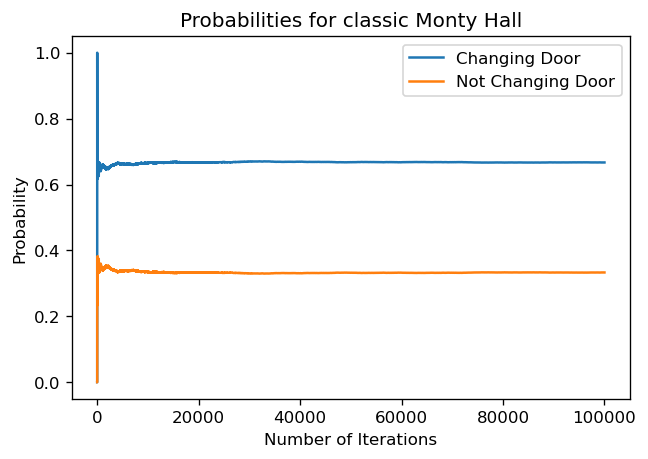

In [1]:
from typing import Union, Tuple, Optional

import numpy as np
import matplotlib.pyplot as plt

# define the variables that we are going to need

# NEED TO CANCEL THE PART OF CW1 AND CW2 WHICH IS NOW UNNECESSARY

n = 100000        # number of simulations

# define the vectors where we are going to keep trace of the wins (=1) and of the losses (=0)
wins_c = np.zeros(n)        # changing door
wins_nc = np.zeros(n)       # not changing door
# define the vectors where we update the probabilities at each step of the loop
probwc = np.zeros(n)        # changing door
probwnc = np.zeros(n)       # not changing door

# loop to simulate each game

for i in range(n):
    wd = np.random.choice(range(1, 4))      # chose randomly the winning door
    cd = np.random.choice(range(1, 4))      # chose randomly the player initial door
    # at this point of the game the host opens the third door with a goat behind.
    # if the chosen door is the one with the car and the player doesn't change the door he wins, otherwise he loose and
    # vice versa
    if wd == cd:
        wins_nc[i] = 1                         # winning without changing door
    else:
        wins_c[i] = 1                          # winning changing door
# now I have to start to compute the mean from the second value because I need at least two element
# for sure there is a smarter way to do this, but I don't know it
    if i > 1:
        probwnc[i] = np.mean(wins_nc[:i])  # updated (from 0 to i) probability of winning without changing the door
        probwc[i] = np.mean(wins_c[:i])  # updated (from 0 to i) probability of winning changing the door


print("The probability of winning without changing the door is = ", probwnc[n-1])
print("The probability of winning changing the door is = ", probwc[n-1])

# now we need to plot the results

# first I define the 'x' vector (shouldn't be necessary, but it doesn't work either way)
x_plot = np.linspace(1, n, n)

plt.figure(1, dpi = 120)
plt.title('Probabilities for classic Monty Hall')
plt.plot(x_plot, probwc, label='Changing Door')
plt.plot(x_plot, probwnc, label='Not Changing Door')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')
plt.show()

2. **Question 2**: What is the probability to win switching door, knowing that the host choose randomly which door to open?

Againg, we can look at this problem by evaluating the cases in which the doors are revealed randomly, i.e., by replacing $P(R) = 1$ in eq. $\eqref{general}$. This leads us to
\begin{equation}
P(\hbox{win switching} | [C], I = A) = \frac{1}{3}
\end{equation}

Down below we provide a python code to approach the problem.

-------------------------------------------------------------------------------------------------------
The probability of winning without changing the door is =  0.33278332783327835
The probability of winning changing the door is =  0.33214332143321434
-------------------------------------------------------------------------------------------------------


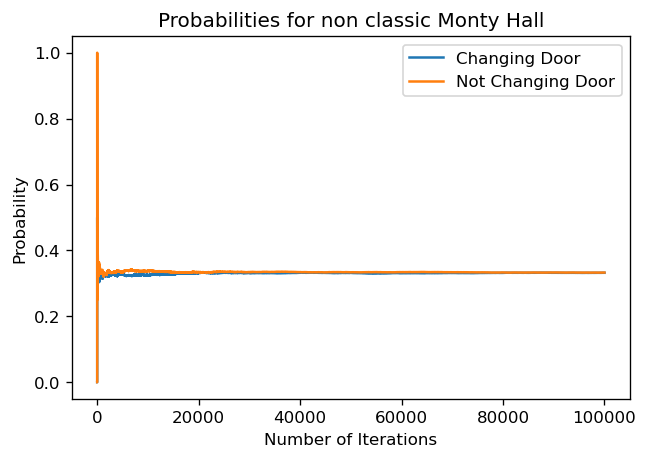

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define the variables that we are going to need

n = 100000                  # number of simulations

# define the vectors where we are going to keep trace of the wins (=1) and of the losses (=0)
wins_c = np.zeros(n)        # changing door
wins_nc = np.zeros(n)       # not changing door
# define the vectors where we update the probabilities at each step of the loop
probwc = np.zeros(n)        # changing door
probwnc = np.zeros(n)       # not changing door

for i in range(n):
    cd = np.random.choice(range(1, 4))          # randomly selecting the chosen door by the player
    wd = np.random.choice(range(1, 4))          # randomly selecting the winning door
    flag = 0                                    # defining a flag that we will use for the while loop
    while flag == 0:
        od = np.random.choice(range(1, 4))      # randomly selecting the door opened by the host
        if od != cd:            # the host cannot open the door chosen by the player
            flag = 1            # change the value of the flag to exit from the while loop
    if (od != wd) and (cd != wd):
        wins_c[i] = 1           # if the initial chosen door is not the winning door, switching the door the player wins
    if cd == wd:
        wins_nc[i] = 1          # the only possibility to win without changing is if initially the chosen door was the
                                # winning door
    # in my opinion the first of the last three "if" is not necessary since the other two do the job.
    # if the initial door is not the one with the car, the player always wins if changes the door, whatever the host
    # opens, assuming he can choose the opened door if it reveals the car.
    # now same if of the previous exercise
    if i > 1:
        probwnc[i] = np.mean(wins_nc[:i])  # updated (from 0 to i) probability of winning without changing the door
        probwc[i] = np.mean(wins_c[:i])  # updated (from 0 to i) probability of winning changing the door

# print the results
print("-------------------------------------------------------------------------------------------------------")
print("The probability of winning without changing the door is = ", probwnc[n - 1])
print("The probability of winning changing the door is = ", probwc[n - 1])
print("-------------------------------------------------------------------------------------------------------")

# plot the results
x_plot = np.linspace(1, n, n)

plt.figure(1, dpi = 120)
plt.title('Probabilities for non classic Monty Hall')
plt.plot(x_plot, probwc, label='Changing Door')
plt.plot(x_plot, probwnc, label='Not Changing Door')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')
plt.show()

3. **Question 3**: What is the probability to win switching door, knowing that the host choose sometimes randomly and sometimes only goats, which door to open?

Using eq. $\eqref{general}$, as $P(R)$ increases towards $1$, the probability of winning by switching doors deacreases from $\displaystyle{\frac{2}{3}}$, when the host knows where car is, to $\displaystyle{\frac{1}{3}}$, when the host opens the door randomly. In this scenario, the variation of the probability can be obtained from the simulation below

-------------------------------------------------------------------------------------------------------
The probability of winning without changing the door is =  [0.33633363 0.33063306 0.33163316 0.33543354 0.3280328  0.33523352
 0.3320332  0.32853285 0.32823282 0.33783378 0.33543354 0.33633363
 0.32353235 0.32783278 0.33953395 0.33243324 0.33023302 0.32613261
 0.33323332 0.33053305 0.33653365 0.3310331  0.32943294 0.33453345
 0.33863386 0.32843284 0.33083308 0.33683368 0.32923292 0.33573357
 0.34053405 0.3450345  0.33513351 0.33683368 0.33083308 0.33313331
 0.33743374 0.33273327 0.33373337 0.33923392 0.32653265 0.33963396
 0.33353335 0.33513351 0.33793379 0.33953395 0.32663266 0.33193319
 0.33213321 0.32813281 0.3350335  0.32913291 0.33483348 0.32653265
 0.33263326 0.33523352 0.33783378 0.32873287 0.33853385 0.33683368
 0.33953395 0.32613261 0.340034   0.33113311 0.33453345 0.33493349
 0.33893389 0.33443344 0.33083308 0.33143314 0.32933293 0.33423342
 0.32643264 0.33273327 0.33193319

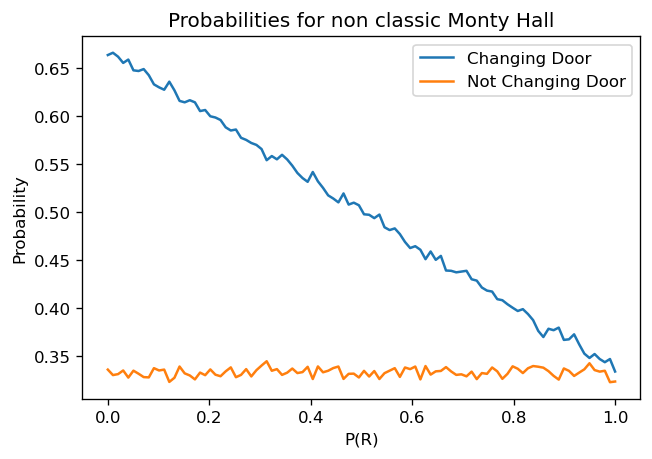

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define the variables that we are going to need

n = 10000                     # number of simulations for each value of k
k = 100                        # number of different probabilities that the host knows which is the winning door

# loop to change the probability that the host knows which is the winning door
pr_wc = np.zeros(k)         # in these vectors we are going to save the probabilities of winning for different k
pr_wnc = np.zeros(k)
for j in range(k):
    # define the vectors where we are going to keep trace of the wins (=1) and of the losses (=0)
    wins_c = np.zeros(n)  # changing door
    wins_nc = np.zeros(n)  # not changing door
    # define the vectors where we update the probabilities at each step of the loop
    probwc = np.zeros(n)  # changing door
    probwnc = np.zeros(n)  # not changing door
    for i in range(n):
        know = np.random.choice(range(1, k + 1))
        if know > j:
            c = 0  # in this case the host knows
        else:
            c = 1  # in this case the host doesn't know
        cd = np.random.choice(range(1, 4))          # randomly selecting the chosen door by the player
        wd = np.random.choice(range(1, 4))          # randomly selecting the winning door
        if c == 1:              # if the host doesn't know the winning door we need to specify the opened door
            flag = 0            # defining a flag that we will use for the while loop
            while flag == 0:
                od = np.random.choice(range(1, 4))      # randomly selecting the door opened by the host
                if od != cd:            # the host cannot open the door chosen by the player
                    flag = 1            # change the value of the flag to exit from the while loop
            if (od != wd) and (cd != wd):
                wins_c[i] = 1  # if the initial chosen door is not the winning door, switching the door the player wins
            if cd == wd:
                wins_nc[i] = 1  # the only possibility to win without changing is if initially the chosen door was the
                                # winning door
        else:
            if wd == cd:
                wins_nc[i] = 1  # winning without changing door
            else:
                wins_c[i] = 1  # winning changing door
        # now I have to start to compute the mean from the second value because I need at least two element
        # for sure there is a smarter way to do this, but I don't know it
        if i > 1:
            probwnc[i] = np.mean(wins_nc[:i])  # updated (from 0 to i) probability of winning without changing the door
            probwc[i] = np.mean(wins_c[:i])    # updated (from 0 to i) probability of winning changing the door
        pr_wc[j] = probwc[i]                   # save the probabilities, in the end doing like this we keep memory
        pr_wnc[j] = probwnc[i]                 # only of the last one for each loop over 'i'

# print the results
print("-------------------------------------------------------------------------------------------------------")
print("The probability of winning without changing the door is = ", pr_wnc)
print("The probability of winning changing the door is = ", pr_wc)
print("-------------------------------------------------------------------------------------------------------")

# plot the results
x_plot = np.linspace(0, 1, k)

plt.figure(1, dpi = 120)
plt.title('Probabilities for non classic Monty Hall')
plt.plot(x_plot, pr_wc, label='Changing Door')
plt.plot(x_plot, pr_wnc, label='Not Changing Door')
plt.legend()
plt.xlabel('P(R)')
plt.ylabel('Probability')
plt.show()